In [2]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#color blindness safe colors
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

newparams = {
  "lines.linewidth": 2.0,
  "axes.edgecolor": "#aaaaaa",
  "patch.linewidth": 1.0,
  "legend.fancybox": 'false',
  "axes.color_cycle": kelly_colors_hex,
  "axes.facecolor": "#ffffff",
  "axes.labelsize": "large",
  "axes.grid": 'false',
  "patch.edgecolor": "#555555",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
}
pl.rcParams.update(newparams)

#spark lines a la Tufte, first with synthetic data

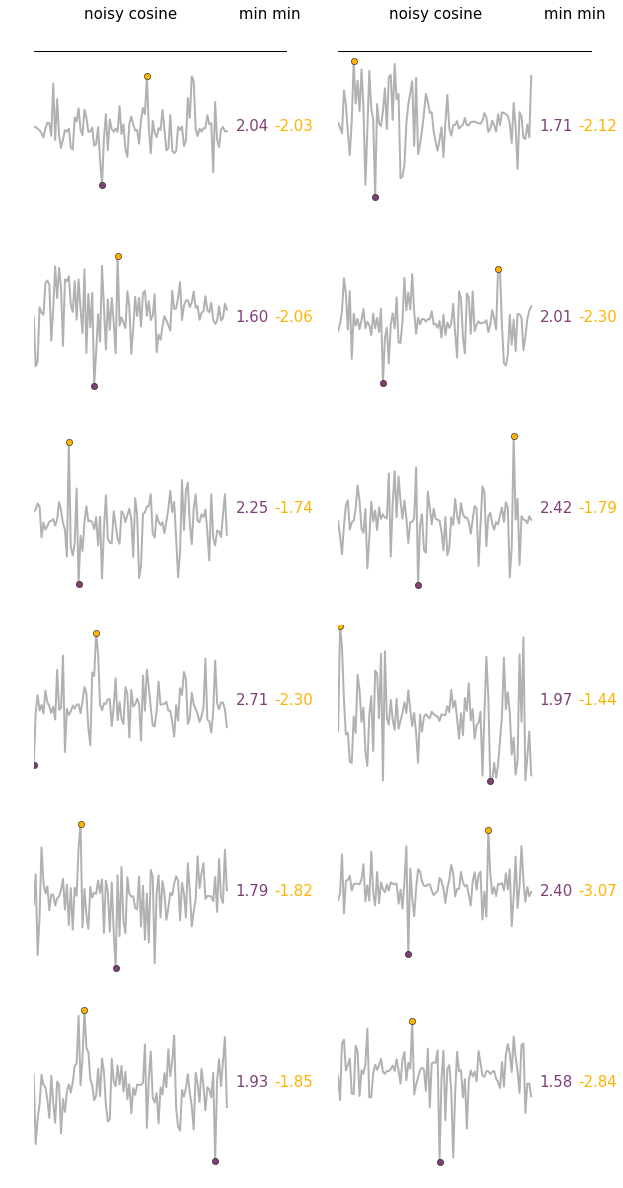

In [6]:

fig = pl.figure(figsize = (10,20));
ax=[]
for i in range(12):
    ax.append(fig.add_subplot(6,2,i+1))
    data=np.random.randn(100)*np.cos(np.arange(100)/3.14*np.random.rand())
    
    ax[i].plot(data, 'k', alpha=0.3)
    ax[i].axis('off')
    ax[i].plot(np.where(data==max(data))[0], max(data),'o')
    ax[i].set_xlim(0,130)
    ax[i].plot(np.where(data==min(data))[0], min(data),'o')
    #ax.text(110, mean(data), "%.2f,%.2f"%(max(data),min(data)), 
    #        fontsize=15)
    #ax.text(0.8, 0.5, "%.2f,%.2f"%(max(data),min(data)), 
    #        fontsize=15, transform = ax.transAxes)
    ax[i].text(0.95, 0.5, "%.2f"%(min(data)), color = kelly_colors_hex[0],
            fontsize=15, transform = ax[i].transAxes)
    ax[i].text(0.8, 0.5, "%.2f"%(max(data)), color = kelly_colors_hex[1],
            fontsize=15, transform = ax[i].transAxes)
    if i<2:
        ax[i].plot((0,ax[i].get_xlim()[1]), (ax[i].get_ylim()[1], ax[i].get_ylim()[1]), 'k-',)

ax[0].text (0.2, 1.2, '{0:1s}             {1:2s} {2:2s}'.format('noisy cosine','min','min'), 
            transform = ax[0].transAxes, fontsize=15)
ax[1].text (0.2, 1.2, '{0:1s}             {1:2s} {2:2s}'.format('noisy cosine','min','min'), 
            transform = ax[1].transAxes, fontsize=15)


#sparklines with real data 
##(using subplot2grid instead of subplot for higher costumization and automatically getting the colors used for max and min datapoint)

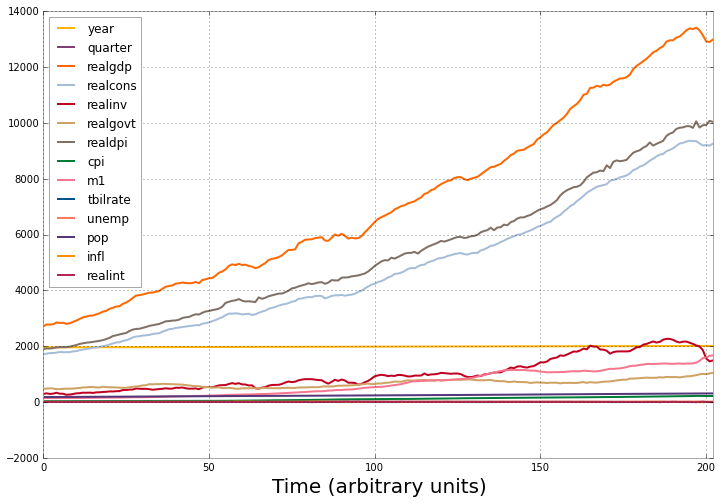

In [37]:
alldata = sm.datasets.macrodata.load_pandas().data

alldata.plot(figsize=(12,8));
pl.xlabel("Time (arbitrary units)", fontsize=20)
#no point in plitting year and quarter as a time series, but i need the range
y0, y1 = alldata['year'].iloc[0], alldata['year'].iloc[-1]

alldata.drop('year', 1, inplace=True)
alldata.drop('quarter', 1, inplace=True)

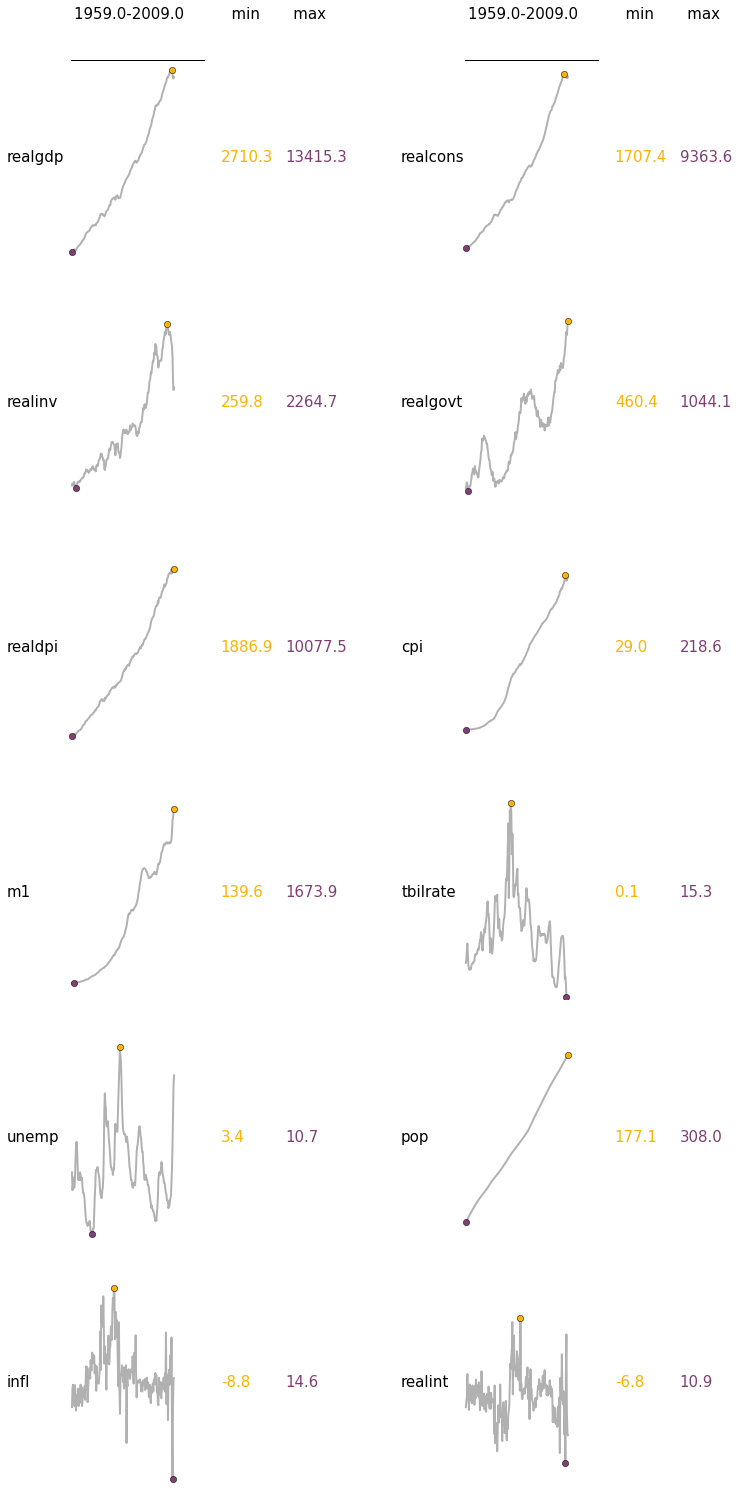

In [39]:
fig = pl.figure(figsize = (10,30))
ax = []

for i, data in enumerate(alldata.values.T):
    
        x2 = 0 if i%2 == 0 else 2
        ax.append(pl.subplot2grid((7,3), ((i/2), x2)))
        ax[i].plot(data, 'k', alpha=0.3)
        ax[i].axis('off')
        ax[i].set_xlim(-len(data)*0.3, len(data)*1.3)
        try:
            bl, = ax[i].plot(np.where(data == max(data))[0], max(data), 'o')
        except ValueError:
            bl, = ax[i].plot(np.where(data == max(data))[0][0], max(data), 'o')
        color_cycle = ax[i]._get_lines.color_cycle
        ax[i].text(1.1, 0.5, "%.1f"%(min(data)), fontsize = 15, 
                   transform = ax[i].transAxes, color=bl.get_color())
        try:
            bl, = ax[i].plot(np.where(data == min(data))[0], min(data), 'o')
        except ValueError:
            bl, = ax[i].plot(np.where(data == min(data))[0][0], min(data), 'o')
        ax[i].text(1.5, 0.5, "%.1f"%(max(data)), fontsize = 15, 
                   transform = ax[i].transAxes, color=bl.get_color())
        ax[i].text(-0.2, 0.5, alldata.columns[i], fontsize = 15, 
                   transform = ax[i].transAxes)
       

        if i<2:
            ax[i].plot((0,ax[i].get_xlim()[1]), 
                    (ax[i].get_ylim()[1], ax[i].get_ylim()[1]), 'k-',)

ax[0].text (0.2, 1.2, '{0:1}-{1:2}          {2:2s}       {3:2s}'.format(
            y0, y1, 'min', 'max'), 
            transform = ax[0].transAxes, fontsize=15)
ax[1].text (0.2, 1.2, '{0:1}-{1:2}          {2:2s}       {3:2s}'.format(
            y0, y1, 'min', 'max'), 
            transform = ax[1].transAxes, fontsize=15)